In [183]:
import numpy as np
import pandas as pd

In [184]:
df=pd.read_csv(r'C:\Users\welcome\Desktop\train.csv')
df.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    1278 non-null   float64
 1   col2    1278 non-null   float64
 2   output  1278 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 30.1 KB


In [186]:
df.shape

(1278, 3)

# Standardization

In [187]:
target = df['output']
data = df.drop("output",axis=1)

In [188]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(1278, 2)


# Train-Test Split

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data, 
                                                   target, 
                                                   test_size = 0.20, 
                                                   random_state = 0)

# Logistic Regression Algorithm

In [194]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [195]:
y_pred = classifier.predict(X_test)


In [196]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.61328125

In [197]:
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

1.0
1.0
1.0
1.0


In [198]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[ 99,   0],
       [  0, 157]], dtype=int64)

<AxesSubplot:>

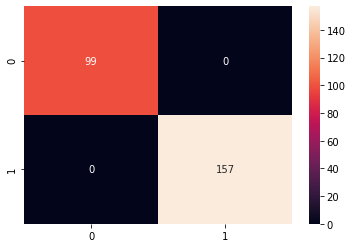

In [199]:
sns.heatmap(con_metric, annot=True, fmt='d')

In [200]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_test_predict)
roc_auc = metrics.auc(fpr, tpr)

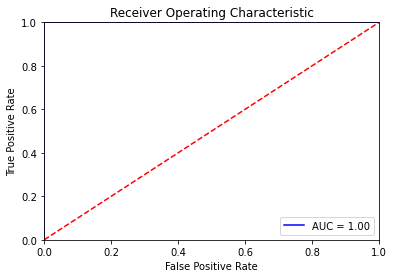

In [201]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM with Linear Kernel

In [202]:
from sklearn.svm import SVC

classifier = SVC(kernel= 'linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [203]:
y_test_predict=classifier.predict(X_test)

In [204]:
print(metrics.accuracy_score(y_test, y_test_predict))

0.61328125


In [205]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[  0,  99],
       [  0, 157]], dtype=int64)

In [206]:
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.61328125
0.5
0.7602905569007264
1.0


In [207]:
import seaborn as sns


<AxesSubplot:>

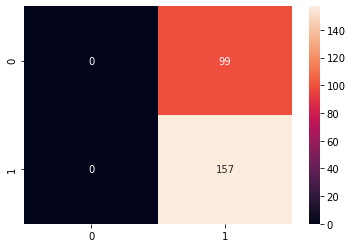

In [208]:
sns.heatmap(con_metric, annot=True, fmt='d')

In [209]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_test_predict)
roc_auc = metrics.auc(fpr, tpr)

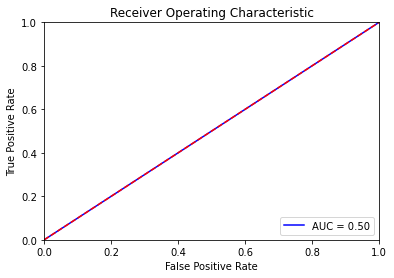

In [210]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM with RBF Kernel

In [244]:
from sklearn.svm import SVC

classifier = SVC(kernel= 'rbf',random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [245]:
dump(model, open(r'C:/Users/welcome/Desktop/ml_dep/pickle/svmrbf.pkl', 'wb'))

In [246]:
y_test_predict=classifier.predict(X_test)

In [247]:
print(metrics.accuracy_score(y_test, y_test_predict))

1.0


In [248]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[ 99,   0],
       [  0, 157]], dtype=int64)

<AxesSubplot:>

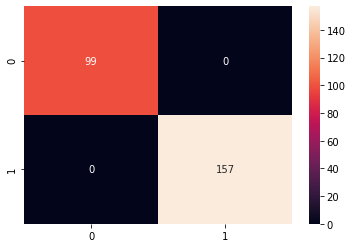

In [249]:
sns.heatmap(con_metric, annot=True, fmt='d')

In [250]:
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

1.0
1.0
1.0
1.0


In [217]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_test_predict)
roc_auc = metrics.auc(fpr, tpr)

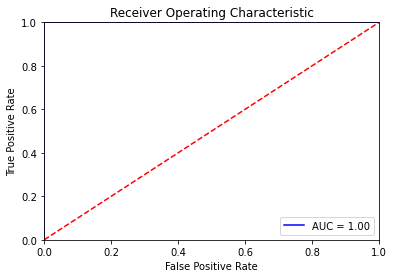

In [218]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# <font color='Green'>Observations</font>

## <font color='red'>Logistic Regression Algorithm</font>

### Accuracy =61.32%
### Precision Score=100%
### ROC-AUC-Score=100%
### F1-Score=100%
### Recall-Score=100%

## <font color ='red'>SVM with Linear Kernel</font>

### Accuracy =61.32%
### Precision Score=61.32%
### ROC-AUC-Score=50%
### F1-Score=76.02%
### Recall-Score=100%

## <font color='red'>SVM with RBF Kernel</font>

### Accuracy =100%
### Precision Score=100%
### ROC-AUC-Score=100%
### F1-Score=100%
### Recall-Score=100%

# <font color='purple'> From the above observations, Given data is working best on <font color='maroon'>SVM with RBF Kernel</font> model</font> 

# Serializing the model

In [228]:
from pickle import dump

In [237]:
model=SVC(kernel="rbf",random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

In [238]:
dump(model, open(r'C:/Users/welcome/Desktop/ml_dep/pickle/svmrbf.pkl', 'wb'))

In [239]:
dump(df, open(r'C:/Users/welcome/Desktop/ml_dep/pickle/df.pkl', 'wb'))

In [251]:
from pickle import load


In [252]:
fitt = load(open(r'C:/Users/welcome/Desktop/ml_dep/pickle/svmrbf.pkl', 'rb'))

In [253]:
import numpy as np
y_test_predict=classifier.predict(np.array(X_test))

In [254]:
y_test_predict

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)